# Examen Classification 20 Décembre 2023

Notebook à compléter et à déposer sur Tomuss

A ajouter lien vers prompt ChatGPT ou Bard

L'ensemble des ressources (fichiers) nécessaires sont disponible sur le google drive :
https://drive.google.com/drive/folders/1-2S5dzlxJ4ifCGfyutujV0tdofx7L20r?usp=sharing



# Partie I - Geo-localisation

Une carte RSSI ("Received Signal Strength Indication"), qui se traduit en français par "Indication de la force du signal reçu", est un outil de mesure utilisé pour évaluer la puissance du signal radio reçu par un dispositif sans fil, comme un routeur Wi-Fi ou un point d'accès. La carte RSSI mesure la force du signal en décibels et peut être utilisée pour déterminer la qualité de la connexion sans fil. Les cartes RSSI sont souvent utilisées dans les réseaux sans fil pour diagnostiquer les problèmes de connexion et optimiser les performances du réseau.

En plus d'être utilisées pour du diagnostique, les cartes RSSI peuvent également être utilisées pour localiser du matériel. Cela est possible car la force du signal reçu par un dispositif sans fil varie en fonction de la distance entre le dispositif et le point d'accès. En mesurant la force du signal reçu par un dispositif à partir de plusieurs points d'accès connus, on peut déterminer la position approximative du dispositif.

Dans cette partie on se donne 4 cartes RSSI (voir fichiers RSSI_X.csv) correspondant à 4 passerelles (bornes wifi) d'un local industriel. Chaque carte RSSI est un tableau de mesures prises tout les metres (en x et y) suivant une grille cartésienne. On veut construire une fonction qui à partir des 4 forces de signal des bornes reçues donne la position $(f_1,f_2,f_3,f_4) ⟶(x,y)$.


## Question 1

Analyser et afficher les 4 cartes RSSI (on pourrat faire qu'un seul graphique des 4 cartes).

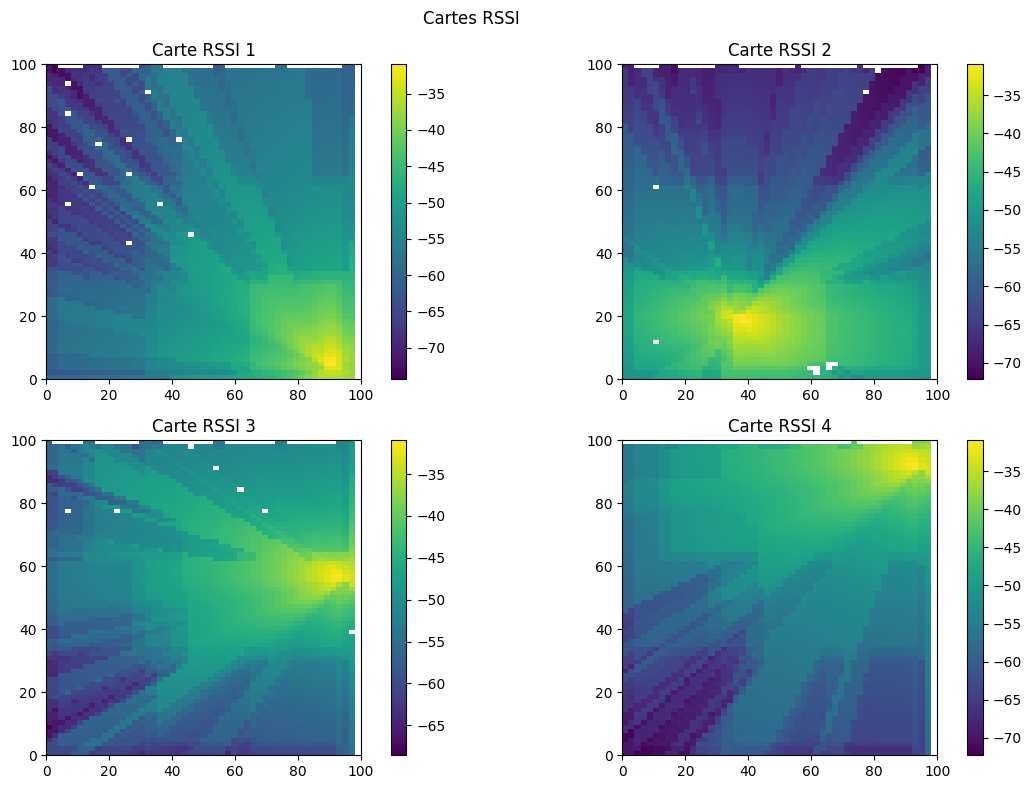

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Liste des noms de fichiers CSV
noms_fichiers = ["RSSI_0.csv", "RSSI_1.csv", "RSSI_2.csv", "RSSI_3.csv"]

# Initialiser un dictionnaire pour stocker les données de chaque fichier
donnees = {}

# Lire chaque fichier CSV et stocker les données dans le dictionnaire
for nom_fichier in noms_fichiers:
 donnees[nom_fichier] = pd.read_csv(nom_fichier)

# Créer une figure pour le tracé
plt.figure(figsize=(12, 8))

# Tracer les 4 cartes RSSI dans une grille 2x2
for i, nom_fichier in enumerate(noms_fichiers, 1):
 plt.subplot(2, 2, i)
 plt.imshow(donnees[nom_fichier], cmap='viridis', origin='lower', extent=[0, 100, 0, 100])
 plt.colorbar()
 plt.title(f'Carte RSSI {i}')

# Ajouter un titre global
plt.suptitle('Cartes RSSI')

# Afficher le graphique
plt.tight_layout()
plt.show()

## Question 2

Proposer une méthode pour compléter les données manquantes

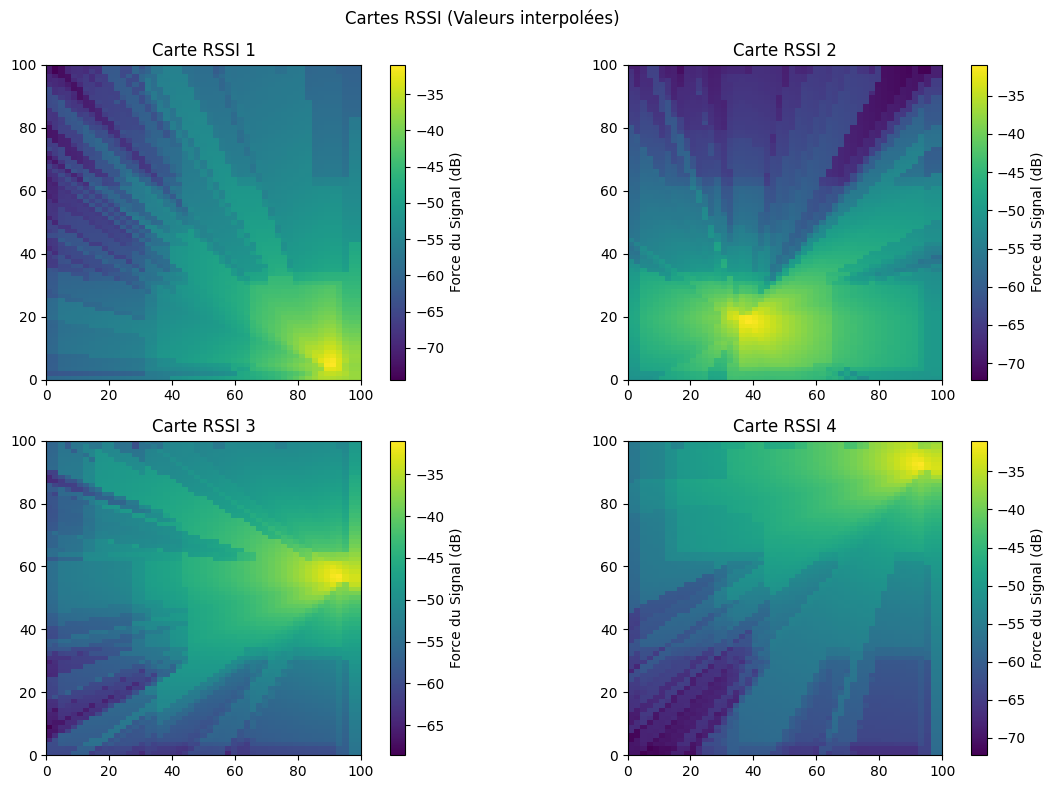

In [8]:
# Lire chaque fichier CSV et stocker les données dans le dictionnaire
for nom_fichier in noms_fichiers:
    donnees[nom_fichier] = pd.read_csv(nom_fichier)
    
# Utiliser la méthode interpolate() pour remplir les valeurs manquantes par interpolation linéaire
for nom_fichier in noms_fichiers:
    donnees[nom_fichier] = donnees[nom_fichier].interpolate(method='linear', axis=0)
    #### Ajout perso !!!!!!! ajouté une interpolation dans les sens des “axis=1” sinon beaucoup de NAN…
    donnees[nom_fichier] = donnees[nom_fichier].interpolate(method='linear', axis=1)
    
# Créer une figure pour le tracé
plt.figure(figsize=(12, 8))

# Tracer les 4 cartes RSSI dans une grille 2x2
for i, nom_fichier in enumerate(noms_fichiers, 1):
    plt.subplot(2, 2, i)
    plt.imshow(donnees[nom_fichier], cmap='viridis', origin='lower', extent=[0, 100, 0, 100])
    cbar = plt.colorbar()
    cbar.set_label('Force du Signal (dB)')
    plt.title(f'Carte RSSI {i}')
    
# Ajouter un titre global
plt.suptitle('Cartes RSSI (Valeurs interpolées)')

# Afficher le graphique
plt.tight_layout()
plt.show()

## Question 3

Construire l'ensemble d'apprentissage du réseau qui met en correspondance les 4 forces du signal et la position $(f_1,f_2,f_3,f_4) ⟶(x,y)$.


In [9]:
# Extraire les données des 4 cartes RSSI
rssi_0_data = donnees["RSSI_0.csv"].values
rssi_1_data = donnees["RSSI_1.csv"].values
rssi_2_data = donnees["RSSI_2.csv"].values
rssi_3_data = donnees["RSSI_3.csv"].values

In [10]:
# Créer le DataFrame d'entrée avec les forces du signal
input_data = pd.DataFrame({
    'f1': rssi_0_data.flatten(),
    'f2': rssi_1_data.flatten(),
    'f3': rssi_2_data.flatten(),
    'f4': rssi_3_data.flatten()
})


In [11]:
import numpy as np

# Créer un tableau des coordonnées (x, y) pour chaque mesure
x_values, y_values = np.meshgrid(np.arange(0, 51), np.arange(0, 73))
positions = pd.DataFrame({
   'x': x_values.flatten(),
   'y': y_values.flatten()
})


## Question 4

Proposer en argumantant vos choix un réseau de neurone dense avec un fonction Loss appropriée.

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
import tensorflow as tf

2025-06-25 18:58:51.852741: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-25 18:58:51.891044: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-25 18:58:52.008903: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750870732.206008 3328354 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750870732.256999 3328354 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1750870732.397732 3328354 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [2]:
import tensorflow as tf
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available: 0


2025-06-25 19:01:20.721024: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [3]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4129278179780983094
xla_global_id: -1
]


In [4]:
import tensorflow as tf
print(tf.__version__)

2.19.0


In [17]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import r2_score
import numpy as np

# Fonction pour calculer le R² score comme une métrique personnalisée
import tensorflow.keras.backend as K

def r2_metric(y_true, y_pred):
    ss_res = K.sum(K.square(y_true - y_pred))
    ss_tot = K.sum(K.square(y_true - K.mean(y_true)))
    r2 = 1 - ss_res / (ss_tot + K.epsilon())
    return r2

# Création du modèle
model = keras.Sequential([
      keras.layers.Input(shape=(4,)), # Couche d'entrée avec 4 neurones
      keras.layers.Dense(23, activation='relu'), # Couche cachée avec ReLU
      keras.layers.Dense(17, activation='relu'), # Couche cachée avec ReLU
      keras.layers.Dense(2) # Couche de sortie avec 2 neurones
])

# Compilation du modèle avec la métrique personnalisée
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae','mse', r2_metric])


## Question 5

En utilisant la métrique "R2 score" et en séparant les données en un ensemble d'apprentissage et un ensemble de test entrainer votre réseau.

Tracer l'historique de l'évolution de la fonction Loss et de la métrique R2

In [18]:
 from sklearn.model_selection import train_test_split
# Divisez les données en ensembles d'apprentissage (80%) et de test (20%)
X_train, X_test, y_train, y_test = train_test_split(input_data, positions, test_size=0.2, random_state=42)

# Correction du type des étiquettes
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

In [19]:
# Entraînement du modèle avec vos données
history = model.fit(X_train, y_train, epochs=500, validation_data=(X_test, y_test), verbose = 0)

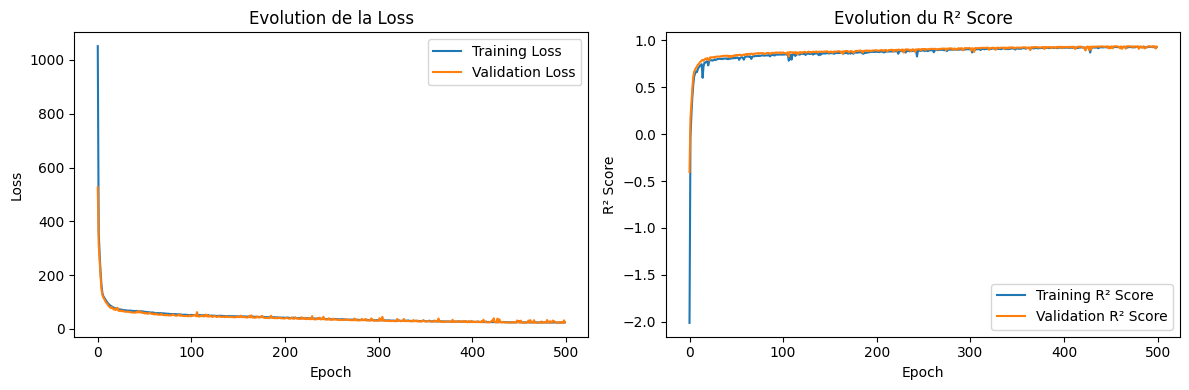

In [20]:
# Extraire les données de l'historique
loss = history.history['loss']
val_loss = history.history['val_loss']
r2 = history.history['r2_metric']
val_r2 = history.history['val_r2_metric']

# Tracer la perte (Loss)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Evolution de la Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Tracer le R² score
plt.subplot(1, 2, 2)
plt.plot(r2, label='Training R² Score')
plt.plot(val_r2, label='Validation R² Score')
plt.title('Evolution du R² Score')
plt.xlabel('Epoch')
plt.ylabel('R² Score')
plt.legend()
plt.tight_layout()
plt.show()

## Question 6

Tracer l'histogramme des distances obtenues entre la position prédites et celle voulue

117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


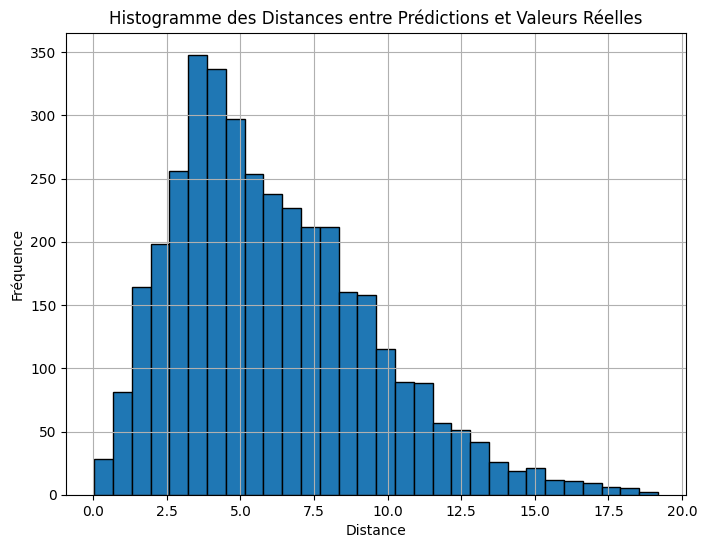

In [21]:
# Faites des prédictions sur vos données de test
y_pred = model.predict(input_data)

# Calculez les distances euclidiennes entre les positions prédites et réelles
distances = np.linalg.norm(y_pred - positions, axis=1)

# Tracer l'histogramme des distances
plt.figure(figsize=(8, 6))
plt.hist(distances, bins=30, edgecolor='k')
plt.title("Histogramme des Distances entre Prédictions et Valeurs Réelles")
plt.xlabel("Distance")
plt.ylabel("Fréquence")
plt.grid(True)
plt.show()


Bonnus carte des distances de prédiction

117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


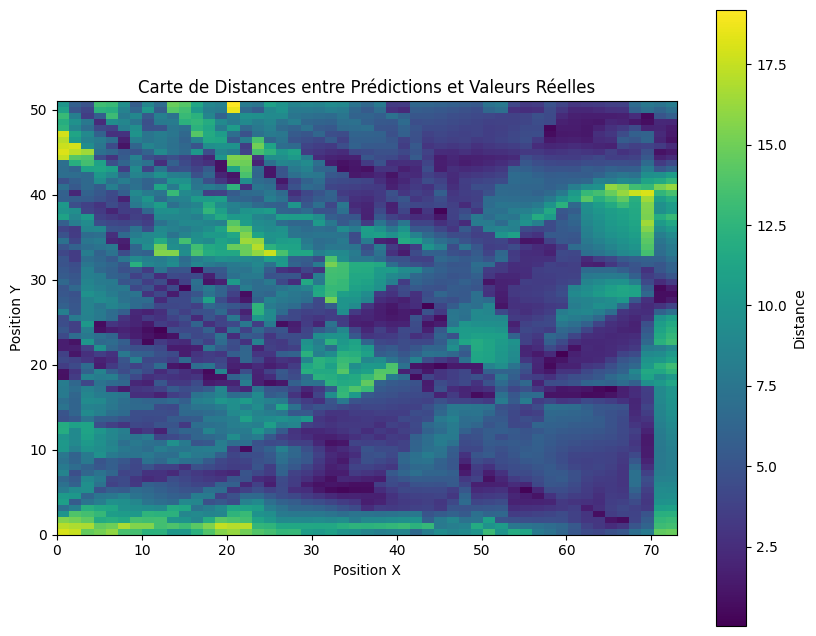

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Faites des prédictions sur vos données de test
y_pred = model.predict(input_data)

# Créez une carte de distances
grid_size = (73, 51) # La taille de la grille correspondant à vos données
dist_map = np.zeros(grid_size) # Initialisation de la carte des distances

# Calcul des distances pour chaque point de la grille
for x in range(grid_size[0]):
    for y in range(grid_size[1]):
        true_pos = np.array([y, x]) # Position réelle
        pred_pos = y_pred[x * grid_size[1] + y] # Position prédite correspondante
        distance = np.linalg.norm(true_pos - pred_pos) # Calcul de la distance
        dist_map[x, y] = distance # Enregistrement de la distance dans la carte

# Tracer la carte de distances
plt.figure(figsize=(10, 8))
plt.imshow(dist_map, cmap='viridis', origin='lower', extent=[0, grid_size[0], 0, grid_size[1]])
plt.colorbar(label='Distance')
plt.title('Carte de Distances entre Prédictions et Valeurs Réelles')
plt.xlabel('Position X')
plt.ylabel('Position Y')
plt.show()

## Question 7

Conclure et donner la précision de votre systeme de localisation.

In [24]:
flat_distances = dist_map.flatten()

# Tri des distances
sorted_distances = np.sort(flat_distances)

# Calcul de la précision à 95%
percentile_95 = np.percentile(sorted_distances, 0.95)

In [25]:
percentile_95

0.759234343026757

In [26]:
std_deviation = np.std(flat_distances)

In [27]:
std_deviation

3.3201104188496324

## Question 8

Proposer une amélioration de votre modèle

## Question 9

Partager votre fil de discution ChatGPT ou autre ici.

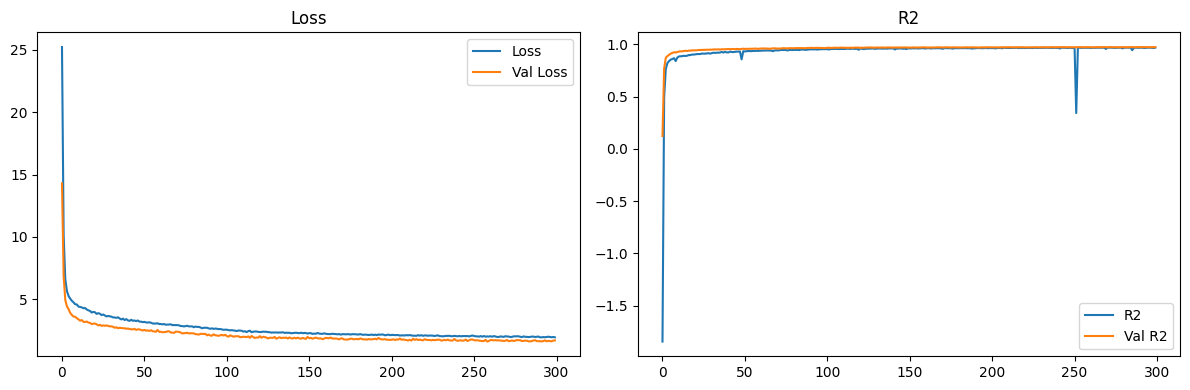

117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


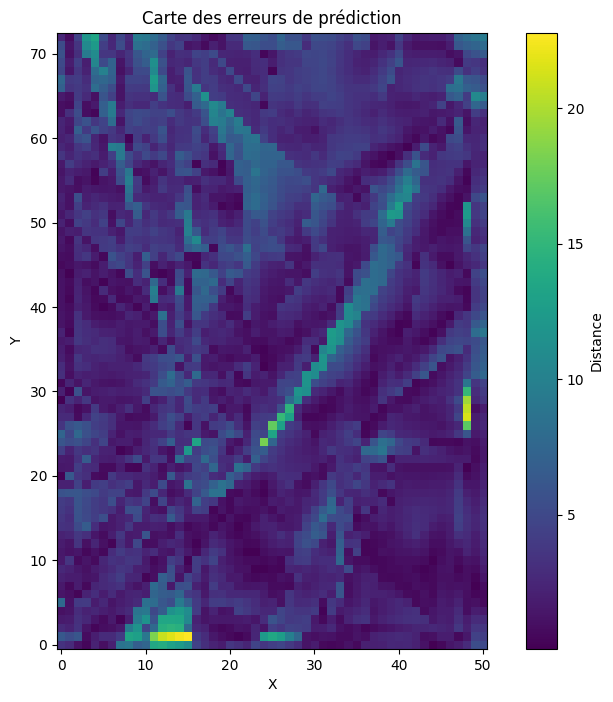

In [28]:
# Chargement des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Lecture et interpolation des données RSSI
noms_fichiers = ["RSSI_0.csv", "RSSI_1.csv", "RSSI_2.csv", "RSSI_3.csv"]
donnees = {}
for nom in noms_fichiers:
    df = pd.read_csv(nom)
    df = df.interpolate(method='linear', axis=0)
    df = df.interpolate(method='linear', axis=1)
    donnees[nom] = df

# Extraction des données
rssi_data = [donnees[nom].values.flatten() for nom in noms_fichiers]
input_data = pd.DataFrame({f"f{i+1}": rssi_data[i] for i in range(4)})

# Ajout de features croisées
input_data['f1_f2'] = input_data['f1'] * input_data['f2']
input_data['f3_f4'] = input_data['f3'] * input_data['f4']

# Normalisation des données
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(input_data), columns=input_data.columns)

# Création des positions (targets)
x_vals, y_vals = np.meshgrid(np.arange(0, 51), np.arange(0, 73))
positions = pd.DataFrame({'x': x_vals.flatten(), 'y': y_vals.flatten()}).astype(np.float32)

# Split des données
X_train, X_test, y_train, y_test = train_test_split(X_scaled, positions, test_size=0.2, random_state=42)

# Métrique personnalisée R²
def r2_metric(y_true, y_pred):
    ss_res = tf.reduce_sum(tf.square(y_true - y_pred))
    ss_tot = tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true)))
    return 1 - ss_res / (ss_tot + tf.keras.backend.epsilon())

# Modèle amélioré
model = keras.Sequential([
    layers.Input(shape=(X_scaled.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(2)
])

model.compile(optimizer='adam', loss=tf.keras.losses.Huber(), metrics=['mae', 'mse', r2_metric])

# Entraînement
history = model.fit(X_train, y_train, epochs=300, validation_data=(X_test, y_test), verbose=0)

# Visualisation
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['r2_metric'], label='R2')
plt.plot(history.history['val_r2_metric'], label='Val R2')
plt.title("R2")
plt.legend()
plt.tight_layout()
plt.show()

# Prédictions sur tout l'ensemble
y_pred = model.predict(X_scaled)
distances = np.linalg.norm(y_pred - positions, axis=1)

# Carte des distances
grid_shape = (73, 51)
dist_map = distances.reshape(grid_shape)
plt.figure(figsize=(10, 8))
plt.imshow(dist_map, cmap='viridis', origin='lower')
plt.colorbar(label='Distance')
plt.title('Carte des erreurs de prédiction')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


Random Forest R2 Score: 0.9880
Random Forest MAE: 1.0543
Random Forest MSE: 3.5651


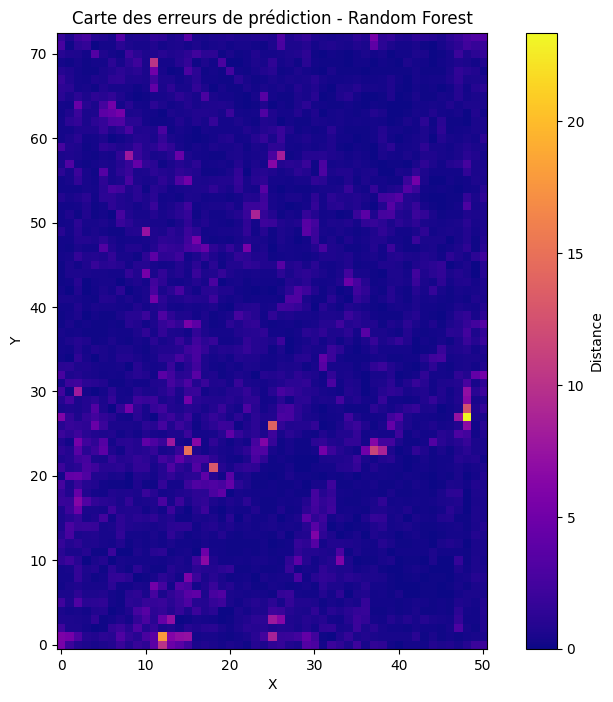

In [29]:
# Chargement des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor

# Lecture et interpolation des données RSSI
noms_fichiers = ["RSSI_0.csv", "RSSI_1.csv", "RSSI_2.csv", "RSSI_3.csv"]
donnees = {}
for nom in noms_fichiers:
    df = pd.read_csv(nom)
    df = df.interpolate(method='linear', axis=0)
    df = df.interpolate(method='linear', axis=1)
    donnees[nom] = df

# Extraction des données
rssi_data = [donnees[nom].values.flatten() for nom in noms_fichiers]
input_data = pd.DataFrame({f"f{i+1}": rssi_data[i] for i in range(4)})

# Ajout de features croisées
input_data['f1_f2'] = input_data['f1'] * input_data['f2']
input_data['f3_f4'] = input_data['f3'] * input_data['f4']

# Normalisation des données
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(input_data), columns=input_data.columns)

# Création des positions (targets)
x_vals, y_vals = np.meshgrid(np.arange(0, 51), np.arange(0, 73))
positions = pd.DataFrame({'x': x_vals.flatten(), 'y': y_vals.flatten()}).astype(np.float32)

# Split des données
X_train, X_test, y_train, y_test = train_test_split(X_scaled, positions, test_size=0.2, random_state=42)

# Entraînement du Random Forest
rf_model = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, random_state=42))
rf_model.fit(X_train, y_train)

# Prédictions et évaluation
predictions = rf_model.predict(X_test)
r2 = r2_score(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
print(f"Random Forest R2 Score: {r2:.4f}")
print(f"Random Forest MAE: {mae:.4f}")
print(f"Random Forest MSE: {mse:.4f}")

# Carte des distances sur l'ensemble complet
y_pred_full = rf_model.predict(X_scaled)
distances = np.linalg.norm(y_pred_full - positions, axis=1)
grid_shape = (73, 51)
dist_map = distances.reshape(grid_shape)

plt.figure(figsize=(10, 8))
plt.imshow(dist_map, cmap='plasma', origin='lower')
plt.colorbar(label='Distance')
plt.title('Carte des erreurs de prédiction - Random Forest')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step

--- Comparaison des modèles ---
Random Forest - R2: 0.9880, MAE: 1.0543, MSE: 3.5651
Deep NN       - R2: 0.9705, MAE: 1.9764, MSE: 8.8327
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


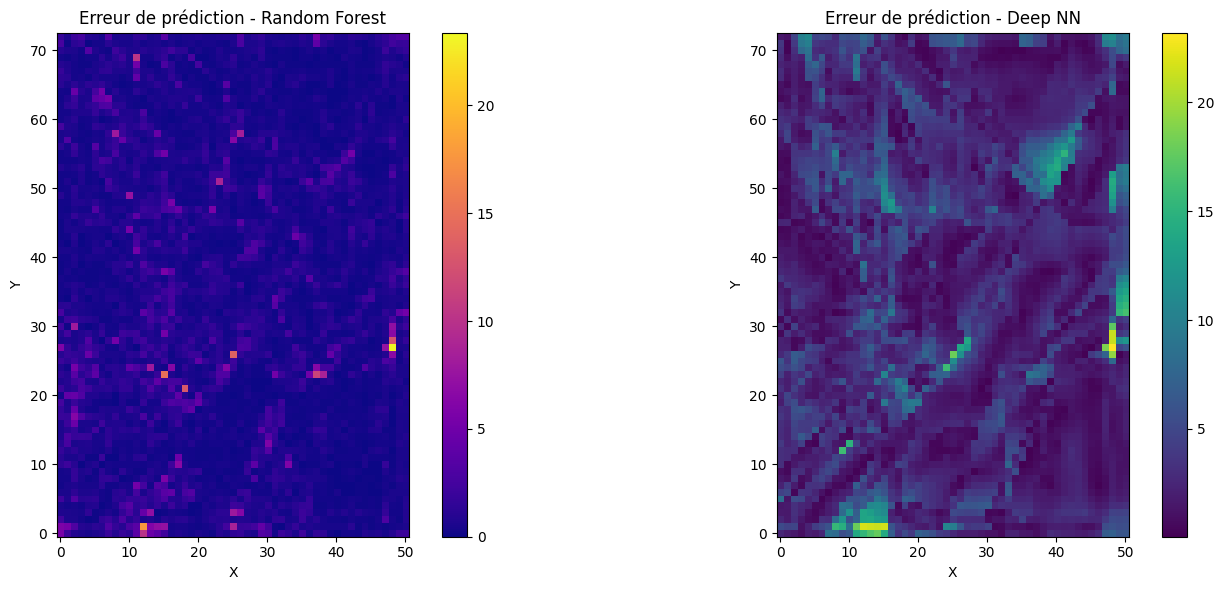

In [30]:
# Chargement des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Lecture et interpolation des données RSSI
noms_fichiers = ["RSSI_0.csv", "RSSI_1.csv", "RSSI_2.csv", "RSSI_3.csv"]
donnees = {}
for nom in noms_fichiers:
    df = pd.read_csv(nom)
    df = df.interpolate(method='linear', axis=0)
    df = df.interpolate(method='linear', axis=1)
    donnees[nom] = df

# Extraction des données
rssi_data = [donnees[nom].values.flatten() for nom in noms_fichiers]
input_data = pd.DataFrame({f"f{i+1}": rssi_data[i] for i in range(4)})

# Ajout de features croisées
input_data['f1_f2'] = input_data['f1'] * input_data['f2']
input_data['f3_f4'] = input_data['f3'] * input_data['f4']

# Normalisation des données
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(input_data), columns=input_data.columns)

# Création des positions (targets)
x_vals, y_vals = np.meshgrid(np.arange(0, 51), np.arange(0, 73))
positions = pd.DataFrame({'x': x_vals.flatten(), 'y': y_vals.flatten()}).astype(np.float32)

# Split des données
X_train, X_test, y_train, y_test = train_test_split(X_scaled, positions, test_size=0.2, random_state=42)

# Entraînement du Random Forest
rf_model = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, random_state=42))
rf_model.fit(X_train, y_train)

# Prédictions et évaluation RF
predictions_rf = rf_model.predict(X_test)
r2_rf = r2_score(y_test, predictions_rf)
mae_rf = mean_absolute_error(y_test, predictions_rf)
mse_rf = mean_squared_error(y_test, predictions_rf)

# Modèle DNN
model = keras.Sequential([
    layers.Input(shape=(X_scaled.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(2)
])

# Métrique personnalisée R²
def r2_metric(y_true, y_pred):
    ss_res = tf.reduce_sum(tf.square(y_true - y_pred))
    ss_tot = tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true)))
    return 1 - ss_res / (ss_tot + tf.keras.backend.epsilon())

model.compile(optimizer='adam', loss=tf.keras.losses.Huber(), metrics=['mae', 'mse', r2_metric])
history = model.fit(X_train, y_train, epochs=300, validation_data=(X_test, y_test), verbose=0)

# Prédictions DNN
predictions_dnn = model.predict(X_test)
r2_dnn = r2_score(y_test, predictions_dnn)
mae_dnn = mean_absolute_error(y_test, predictions_dnn)
mse_dnn = mean_squared_error(y_test, predictions_dnn)

# Comparaison des métriques
print("\n--- Comparaison des modèles ---")
print(f"Random Forest - R2: {r2_rf:.4f}, MAE: {mae_rf:.4f}, MSE: {mse_rf:.4f}")
print(f"Deep NN       - R2: {r2_dnn:.4f}, MAE: {mae_dnn:.4f}, MSE: {mse_dnn:.4f}")

# Visualisation des erreurs spatiales
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# RF
y_pred_full_rf = rf_model.predict(X_scaled)
dist_rf = np.linalg.norm(y_pred_full_rf - positions, axis=1).reshape((73, 51))
axes[0].imshow(dist_rf, cmap='plasma', origin='lower')
axes[0].set_title('Erreur de prédiction - Random Forest')
axes[0].set_xlabel('X')
axes[0].set_ylabel('Y')

# DNN
y_pred_full_dnn = model.predict(X_scaled)
dist_dnn = np.linalg.norm(y_pred_full_dnn - positions, axis=1).reshape((73, 51))
axes[1].imshow(dist_dnn, cmap='viridis', origin='lower')
axes[1].set_title('Erreur de prédiction - Deep NN')
axes[1].set_xlabel('X')
axes[1].set_ylabel('Y')

plt.colorbar(axes[0].images[0], ax=axes[0], fraction=0.046, pad=0.04)
plt.colorbar(axes[1].images[0], ax=axes[1], fraction=0.046, pad=0.04)
plt.tight_layout()
plt.show()


In [32]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 10.6 MB/s eta 0:00:0000:0100:01


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step

--- Comparaison des modèles ---
Random Forest - R2: 0.9880, MAE: 1.0543, MSE: 3.5651
XGBoost       - R2: 0.9862, MAE: 1.2830, MSE: 4.1030
Deep NN       - R2: 0.9606, MAE: 2.4125, MSE: 11.7018
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


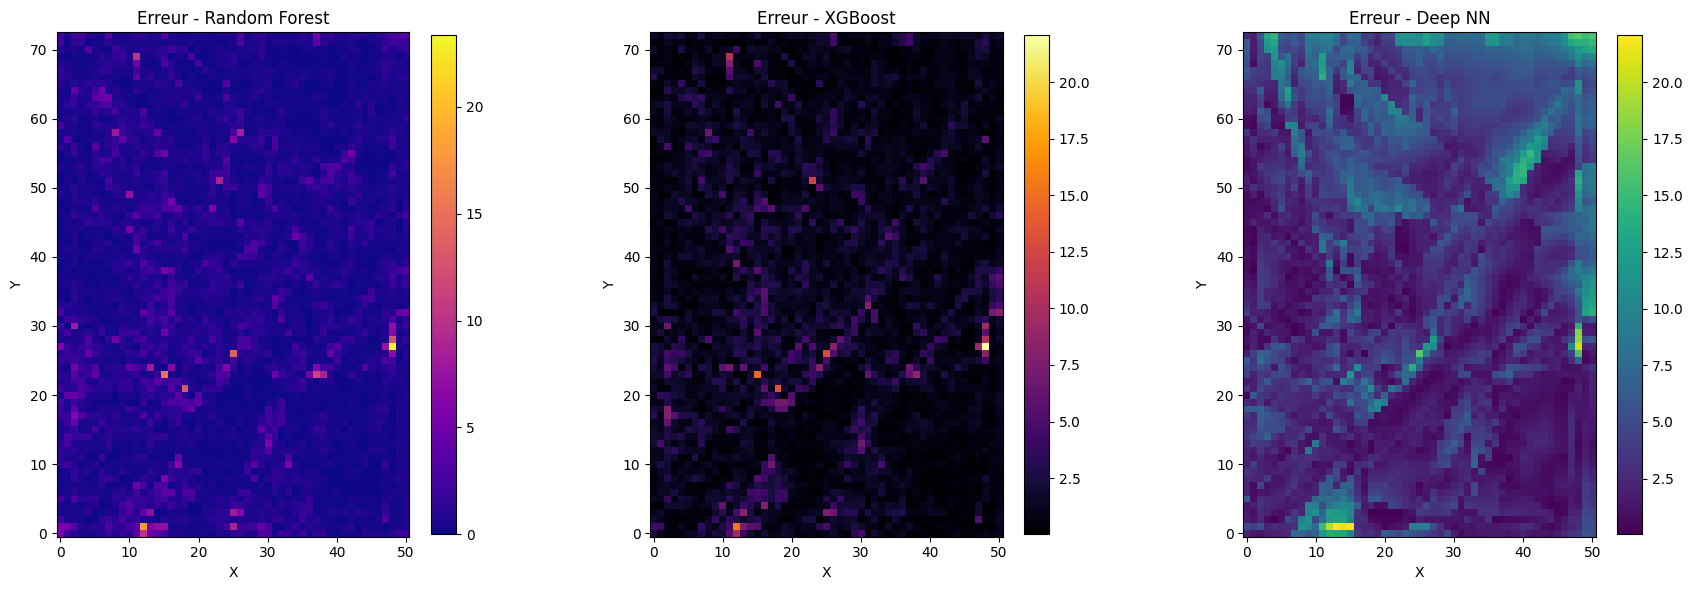

In [33]:
# Chargement des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from xgboost import XGBRegressor

# Lecture et interpolation des données RSSI
noms_fichiers = ["RSSI_0.csv", "RSSI_1.csv", "RSSI_2.csv", "RSSI_3.csv"]
donnees = {}
for nom in noms_fichiers:
    df = pd.read_csv(nom)
    df = df.interpolate(method='linear', axis=0)
    df = df.interpolate(method='linear', axis=1)
    donnees[nom] = df

# Extraction des données
rssi_data = [donnees[nom].values.flatten() for nom in noms_fichiers]
input_data = pd.DataFrame({f"f{i+1}": rssi_data[i] for i in range(4)})

# Ajout de features croisées
input_data['f1_f2'] = input_data['f1'] * input_data['f2']
input_data['f3_f4'] = input_data['f3'] * input_data['f4']

# Normalisation des données
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(input_data), columns=input_data.columns)

# Création des positions (targets)
x_vals, y_vals = np.meshgrid(np.arange(0, 51), np.arange(0, 73))
positions = pd.DataFrame({'x': x_vals.flatten(), 'y': y_vals.flatten()}).astype(np.float32)

# Split des données
X_train, X_test, y_train, y_test = train_test_split(X_scaled, positions, test_size=0.2, random_state=42)

# Entraînement du Random Forest
rf_model = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, random_state=42))
rf_model.fit(X_train, y_train)

# Prédictions et évaluation RF
predictions_rf = rf_model.predict(X_test)
r2_rf = r2_score(y_test, predictions_rf)
mae_rf = mean_absolute_error(y_test, predictions_rf)
mse_rf = mean_squared_error(y_test, predictions_rf)

# Entraînement du modèle XGBoost
xgb_model = MultiOutputRegressor(XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42, verbosity=0))
xgb_model.fit(X_train, y_train)

# Prédictions et évaluation XGBoost
predictions_xgb = xgb_model.predict(X_test)
r2_xgb = r2_score(y_test, predictions_xgb)
mae_xgb = mean_absolute_error(y_test, predictions_xgb)
mse_xgb = mean_squared_error(y_test, predictions_xgb)

# Modèle DNN
model = keras.Sequential([
    layers.Input(shape=(X_scaled.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(2)
])

# Métrique personnalisée R²
def r2_metric(y_true, y_pred):
    ss_res = tf.reduce_sum(tf.square(y_true - y_pred))
    ss_tot = tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true)))
    return 1 - ss_res / (ss_tot + tf.keras.backend.epsilon())

model.compile(optimizer='adam', loss=tf.keras.losses.Huber(), metrics=['mae', 'mse', r2_metric])
history = model.fit(X_train, y_train, epochs=300, validation_data=(X_test, y_test), verbose=0)

# Prédictions DNN
predictions_dnn = model.predict(X_test)
r2_dnn = r2_score(y_test, predictions_dnn)
mae_dnn = mean_absolute_error(y_test, predictions_dnn)
mse_dnn = mean_squared_error(y_test, predictions_dnn)

# Comparaison des métriques
print("\n--- Comparaison des modèles ---")
print(f"Random Forest - R2: {r2_rf:.4f}, MAE: {mae_rf:.4f}, MSE: {mse_rf:.4f}")
print(f"XGBoost       - R2: {r2_xgb:.4f}, MAE: {mae_xgb:.4f}, MSE: {mse_xgb:.4f}")
print(f"Deep NN       - R2: {r2_dnn:.4f}, MAE: {mae_dnn:.4f}, MSE: {mse_dnn:.4f}")

# Visualisation des erreurs spatiales
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# RF
y_pred_full_rf = rf_model.predict(X_scaled)
dist_rf = np.linalg.norm(y_pred_full_rf - positions, axis=1).reshape((73, 51))
axes[0].imshow(dist_rf, cmap='plasma', origin='lower')
axes[0].set_title('Erreur - Random Forest')
axes[0].set_xlabel('X')
axes[0].set_ylabel('Y')

# XGB
y_pred_full_xgb = xgb_model.predict(X_scaled)
dist_xgb = np.linalg.norm(y_pred_full_xgb - positions, axis=1).reshape((73, 51))
axes[1].imshow(dist_xgb, cmap='inferno', origin='lower')
axes[1].set_title('Erreur - XGBoost')
axes[1].set_xlabel('X')
axes[1].set_ylabel('Y')

# DNN
y_pred_full_dnn = model.predict(X_scaled)
dist_dnn = np.linalg.norm(y_pred_full_dnn - positions, axis=1).reshape((73, 51))
axes[2].imshow(dist_dnn, cmap='viridis', origin='lower')
axes[2].set_title('Erreur - Deep NN')
axes[2].set_xlabel('X')
axes[2].set_ylabel('Y')

for ax in axes:
    plt.colorbar(ax.images[0], ax=ax, fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step

--- Comparaison des modèles ---
Random Forest - R2: 0.9880, MAE: 1.0543, MSE: 3.5651
XGBoost       - R2: 0.9862, MAE: 1.2830, MSE: 4.1030
Deep NN       - R2: 0.9517, MAE: 2.5899, MSE: 14.2148

✅ Meilleur modèle sélectionné automatiquement : Random Forest (R2 = 0.9880)
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


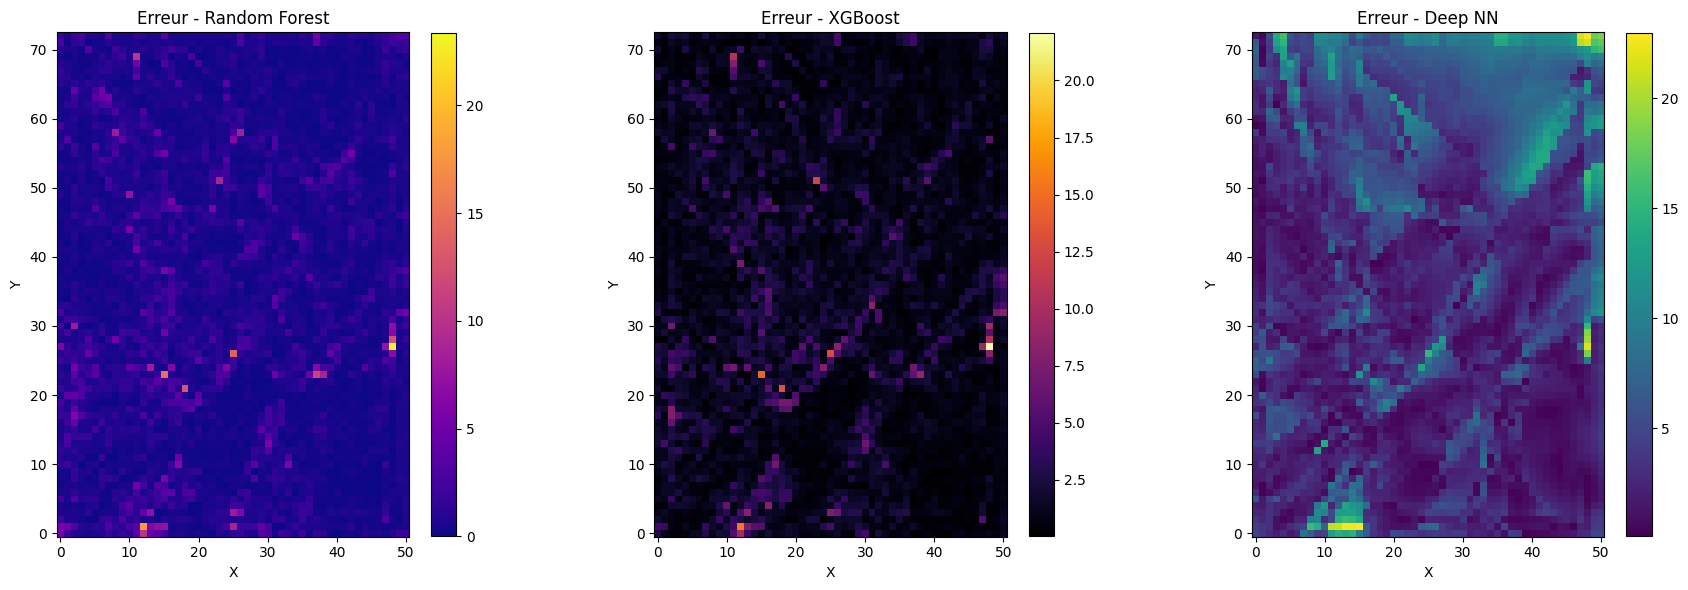

In [34]:
# Chargement des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from xgboost import XGBRegressor

# Lecture et interpolation des données RSSI
noms_fichiers = ["RSSI_0.csv", "RSSI_1.csv", "RSSI_2.csv", "RSSI_3.csv"]
donnees = {}
for nom in noms_fichiers:
    df = pd.read_csv(nom)
    df = df.interpolate(method='linear', axis=0)
    df = df.interpolate(method='linear', axis=1)
    donnees[nom] = df

# Extraction des données
rssi_data = [donnees[nom].values.flatten() for nom in noms_fichiers]
input_data = pd.DataFrame({f"f{i+1}": rssi_data[i] for i in range(4)})

# Ajout de features croisées
input_data['f1_f2'] = input_data['f1'] * input_data['f2']
input_data['f3_f4'] = input_data['f3'] * input_data['f4']

# Normalisation des données
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(input_data), columns=input_data.columns)

# Création des positions (targets)
x_vals, y_vals = np.meshgrid(np.arange(0, 51), np.arange(0, 73))
positions = pd.DataFrame({'x': x_vals.flatten(), 'y': y_vals.flatten()}).astype(np.float32)

# Split des données
X_train, X_test, y_train, y_test = train_test_split(X_scaled, positions, test_size=0.2, random_state=42)

# Entraînement du Random Forest
rf_model = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, random_state=42))
rf_model.fit(X_train, y_train)
predictions_rf = rf_model.predict(X_test)
r2_rf = r2_score(y_test, predictions_rf)
mae_rf = mean_absolute_error(y_test, predictions_rf)
mse_rf = mean_squared_error(y_test, predictions_rf)

# Entraînement du XGBoost
xgb_model = MultiOutputRegressor(XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42, verbosity=0))
xgb_model.fit(X_train, y_train)
predictions_xgb = xgb_model.predict(X_test)
r2_xgb = r2_score(y_test, predictions_xgb)
mae_xgb = mean_absolute_error(y_test, predictions_xgb)
mse_xgb = mean_squared_error(y_test, predictions_xgb)

# Entraînement du DNN
model = keras.Sequential([
    layers.Input(shape=(X_scaled.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(2)
])

def r2_metric(y_true, y_pred):
    ss_res = tf.reduce_sum(tf.square(y_true - y_pred))
    ss_tot = tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true)))
    return 1 - ss_res / (ss_tot + tf.keras.backend.epsilon())

model.compile(optimizer='adam', loss=tf.keras.losses.Huber(), metrics=['mae', 'mse', r2_metric])
history = model.fit(X_train, y_train, epochs=300, validation_data=(X_test, y_test), verbose=0)
predictions_dnn = model.predict(X_test)
r2_dnn = r2_score(y_test, predictions_dnn)
mae_dnn = mean_absolute_error(y_test, predictions_dnn)
mse_dnn = mean_squared_error(y_test, predictions_dnn)

# Comparaison automatique des performances
model_scores = {
    "Random Forest": {"R2": r2_rf, "MAE": mae_rf, "MSE": mse_rf},
    "XGBoost": {"R2": r2_xgb, "MAE": mae_xgb, "MSE": mse_xgb},
    "Deep NN": {"R2": r2_dnn, "MAE": mae_dnn, "MSE": mse_dnn},
}

print("\n--- Comparaison des modèles ---")
best_model = None
best_r2 = -np.inf
for name, scores in model_scores.items():
    print(f"{name:<13} - R2: {scores['R2']:.4f}, MAE: {scores['MAE']:.4f}, MSE: {scores['MSE']:.4f}")
    if scores['R2'] > best_r2:
        best_model = name
        best_r2 = scores['R2']

print(f"\n✅ Meilleur modèle sélectionné automatiquement : {best_model} (R2 = {best_r2:.4f})")

# Visualisation des erreurs spatiales
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# RF
y_pred_full_rf = rf_model.predict(X_scaled)
dist_rf = np.linalg.norm(y_pred_full_rf - positions, axis=1).reshape((73, 51))
axes[0].imshow(dist_rf, cmap='plasma', origin='lower')
axes[0].set_title('Erreur - Random Forest')
axes[0].set_xlabel('X')
axes[0].set_ylabel('Y')

# XGB
y_pred_full_xgb = xgb_model.predict(X_scaled)
dist_xgb = np.linalg.norm(y_pred_full_xgb - positions, axis=1).reshape((73, 51))
axes[1].imshow(dist_xgb, cmap='inferno', origin='lower')
axes[1].set_title('Erreur - XGBoost')
axes[1].set_xlabel('X')
axes[1].set_ylabel('Y')

# DNN
y_pred_full_dnn = model.predict(X_scaled)
dist_dnn = np.linalg.norm(y_pred_full_dnn - positions, axis=1).reshape((73, 51))
axes[2].imshow(dist_dnn, cmap='viridis', origin='lower')
axes[2].set_title('Erreur - Deep NN')
axes[2].set_xlabel('X')
axes[2].set_ylabel('Y')

for ax in axes:
    plt.colorbar(ax.images[0], ax=ax, fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step

--- Comparaison des modèles ---
Random Forest - R2: 0.9880, MAE: 1.0543, MSE: 3.5651
XGBoost       - R2: 0.9862, MAE: 1.2830, MSE: 4.1030
Deep NN       - R2: 0.9501, MAE: 2.8230, MSE: 16.0535

✅ Meilleur modèle sélectionné automatiquement : Random Forest (R2 = 0.9880)


/tmp/ipykernel_3328354/338248889.py:111: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(model_names, rotation=45)
/tmp/ipykernel_3328354/338248889.py:111: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(model_names, rotation=45)
/tmp/ipykernel_3328354/338248889.py:111: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(model_names, rotation=45)


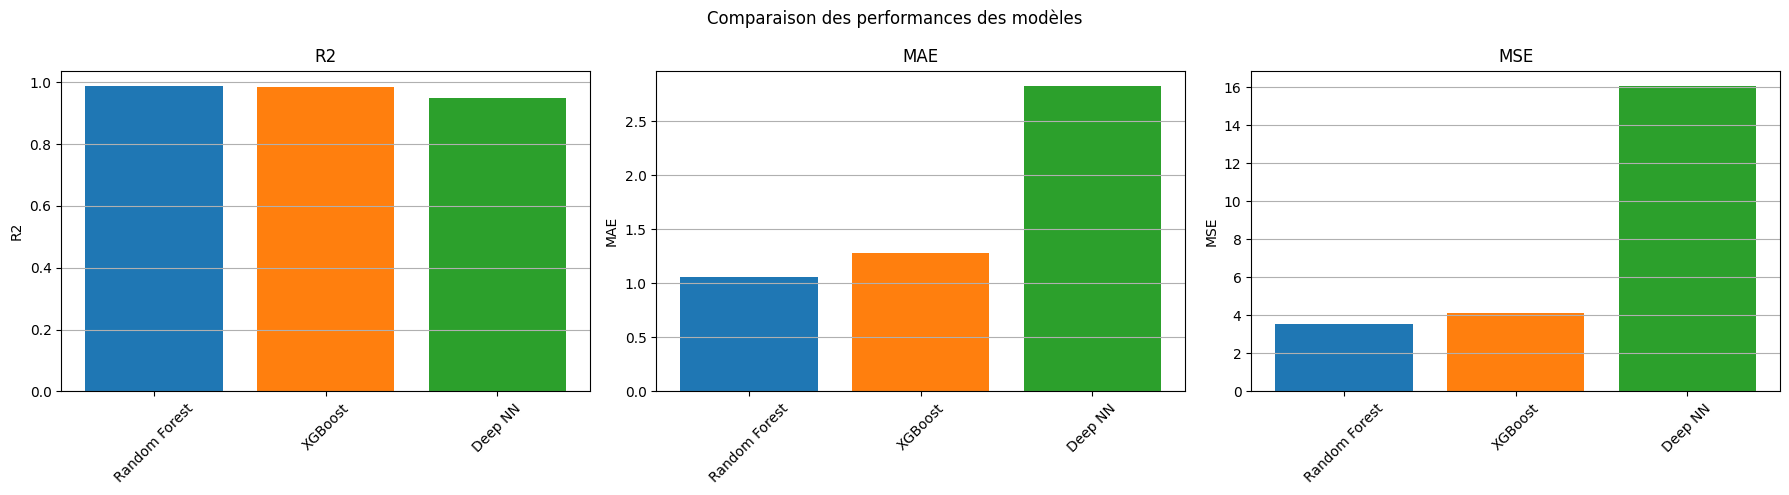

117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


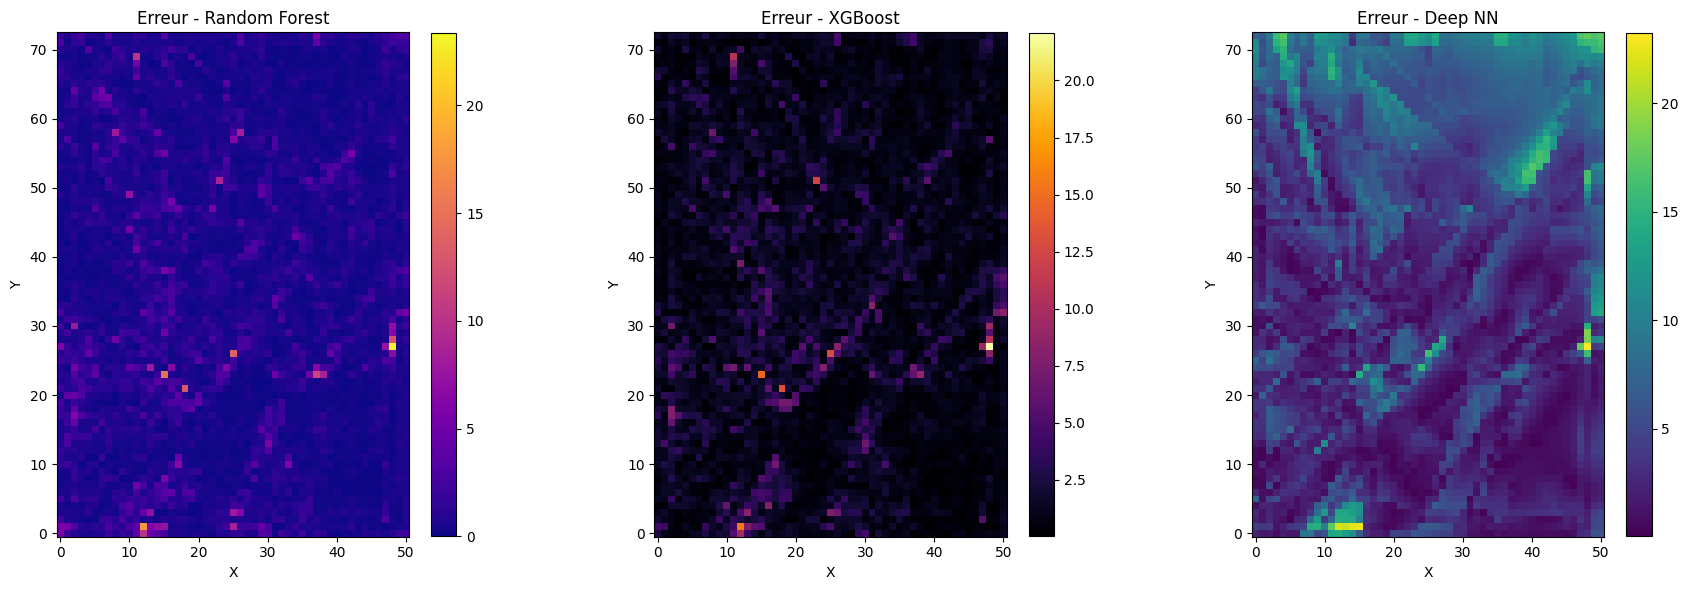

In [35]:
# Chargement des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from xgboost import XGBRegressor

# Lecture et interpolation des données RSSI
noms_fichiers = ["RSSI_0.csv", "RSSI_1.csv", "RSSI_2.csv", "RSSI_3.csv"]
donnees = {}
for nom in noms_fichiers:
    df = pd.read_csv(nom)
    df = df.interpolate(method='linear', axis=0)
    df = df.interpolate(method='linear', axis=1)
    donnees[nom] = df

# Extraction des données
rssi_data = [donnees[nom].values.flatten() for nom in noms_fichiers]
input_data = pd.DataFrame({f"f{i+1}": rssi_data[i] for i in range(4)})

# Ajout de features croisées
input_data['f1_f2'] = input_data['f1'] * input_data['f2']
input_data['f3_f4'] = input_data['f3'] * input_data['f4']

# Normalisation des données
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(input_data), columns=input_data.columns)

# Création des positions (targets)
x_vals, y_vals = np.meshgrid(np.arange(0, 51), np.arange(0, 73))
positions = pd.DataFrame({'x': x_vals.flatten(), 'y': y_vals.flatten()}).astype(np.float32)

# Split des données
X_train, X_test, y_train, y_test = train_test_split(X_scaled, positions, test_size=0.2, random_state=42)

# Entraînement du Random Forest
rf_model = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, random_state=42))
rf_model.fit(X_train, y_train)
predictions_rf = rf_model.predict(X_test)
r2_rf = r2_score(y_test, predictions_rf)
mae_rf = mean_absolute_error(y_test, predictions_rf)
mse_rf = mean_squared_error(y_test, predictions_rf)

# Entraînement du XGBoost
xgb_model = MultiOutputRegressor(XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42, verbosity=0))
xgb_model.fit(X_train, y_train)
predictions_xgb = xgb_model.predict(X_test)
r2_xgb = r2_score(y_test, predictions_xgb)
mae_xgb = mean_absolute_error(y_test, predictions_xgb)
mse_xgb = mean_squared_error(y_test, predictions_xgb)

# Entraînement du DNN
model = keras.Sequential([
    layers.Input(shape=(X_scaled.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(2)
])

def r2_metric(y_true, y_pred):
    ss_res = tf.reduce_sum(tf.square(y_true - y_pred))
    ss_tot = tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true)))
    return 1 - ss_res / (ss_tot + tf.keras.backend.epsilon())

model.compile(optimizer='adam', loss=tf.keras.losses.Huber(), metrics=['mae', 'mse', r2_metric])
history = model.fit(X_train, y_train, epochs=300, validation_data=(X_test, y_test), verbose=0)
predictions_dnn = model.predict(X_test)
r2_dnn = r2_score(y_test, predictions_dnn)
mae_dnn = mean_absolute_error(y_test, predictions_dnn)
mse_dnn = mean_squared_error(y_test, predictions_dnn)

# Comparaison automatique des performances
model_scores = {
    "Random Forest": {"R2": r2_rf, "MAE": mae_rf, "MSE": mse_rf},
    "XGBoost": {"R2": r2_xgb, "MAE": mae_xgb, "MSE": mse_xgb},
    "Deep NN": {"R2": r2_dnn, "MAE": mae_dnn, "MSE": mse_dnn},
}

print("\n--- Comparaison des modèles ---")
best_model = None
best_r2 = -np.inf
for name, scores in model_scores.items():
    print(f"{name:<13} - R2: {scores['R2']:.4f}, MAE: {scores['MAE']:.4f}, MSE: {scores['MSE']:.4f}")
    if scores['R2'] > best_r2:
        best_model = name
        best_r2 = scores['R2']

print(f"\n✅ Meilleur modèle sélectionné automatiquement : {best_model} (R2 = {best_r2:.4f})")

# Graphique comparatif des scores
metrics = ['R2', 'MAE', 'MSE']
model_names = list(model_scores.keys())
values = [[model_scores[m][metric] for m in model_names] for metric in metrics]

fig, ax = plt.subplots(1, 3, figsize=(18, 5))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

for i, metric in enumerate(metrics):
    ax[i].bar(model_names, values[i], color=colors)
    ax[i].set_title(metric)
    ax[i].set_ylabel(metric)
    ax[i].set_xticklabels(model_names, rotation=45)
    ax[i].grid(True, axis='y')

plt.suptitle('Comparaison des performances des modèles')
plt.tight_layout()
plt.show()

# Visualisation des erreurs spatiales
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# RF
y_pred_full_rf = rf_model.predict(X_scaled)
dist_rf = np.linalg.norm(y_pred_full_rf - positions, axis=1).reshape((73, 51))
axes[0].imshow(dist_rf, cmap='plasma', origin='lower')
axes[0].set_title('Erreur - Random Forest')
axes[0].set_xlabel('X')
axes[0].set_ylabel('Y')

# XGB
y_pred_full_xgb = xgb_model.predict(X_scaled)
dist_xgb = np.linalg.norm(y_pred_full_xgb - positions, axis=1).reshape((73, 51))
axes[1].imshow(dist_xgb, cmap='inferno', origin='lower')
axes[1].set_title('Erreur - XGBoost')
axes[1].set_xlabel('X')
axes[1].set_ylabel('Y')

# DNN
y_pred_full_dnn = model.predict(X_scaled)
dist_dnn = np.linalg.norm(y_pred_full_dnn - positions, axis=1).reshape((73, 51))
axes[2].imshow(dist_dnn, cmap='viridis', origin='lower')
axes[2].set_title('Erreur - Deep NN')
axes[2].set_xlabel('X')
axes[2].set_ylabel('Y')

for ax in axes:
    plt.colorbar(ax.images[0], ax=ax, fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step

--- Comparaison des modèles ---
Random Forest - R2: 0.9880, MAE: 1.0543, MSE: 3.5651
XGBoost       - R2: 0.9862, MAE: 1.2830, MSE: 4.1030
Deep NN       - R2: 0.9696, MAE: 2.0285, MSE: 9.0940

✅ Meilleur modèle sélectionné automatiquement : Random Forest (R2 = 0.9880)
📦 Modèle 'Random Forest' sauvegardé dans './modeles_sauvegardes'


/tmp/ipykernel_3328354/2525626452.py:126: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(model_names, rotation=45)
/tmp/ipykernel_3328354/2525626452.py:126: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(model_names, rotation=45)
/tmp/ipykernel_3328354/2525626452.py:126: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(model_names, rotation=45)


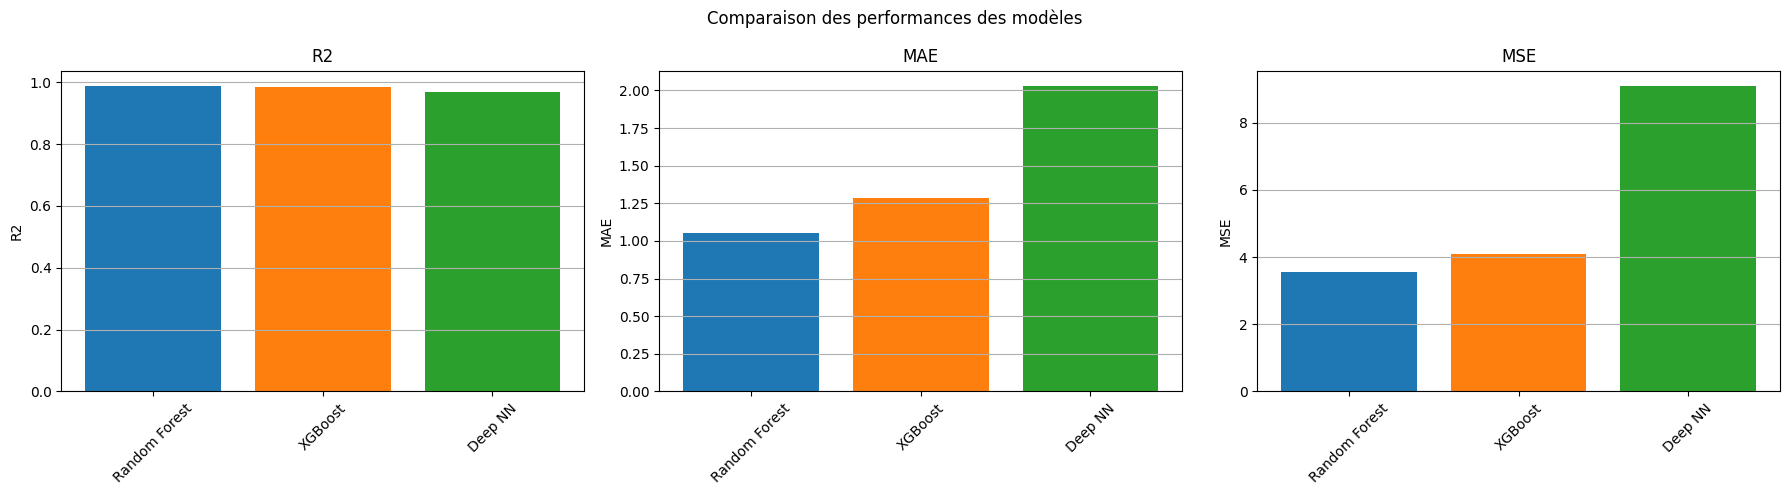

117/117 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step


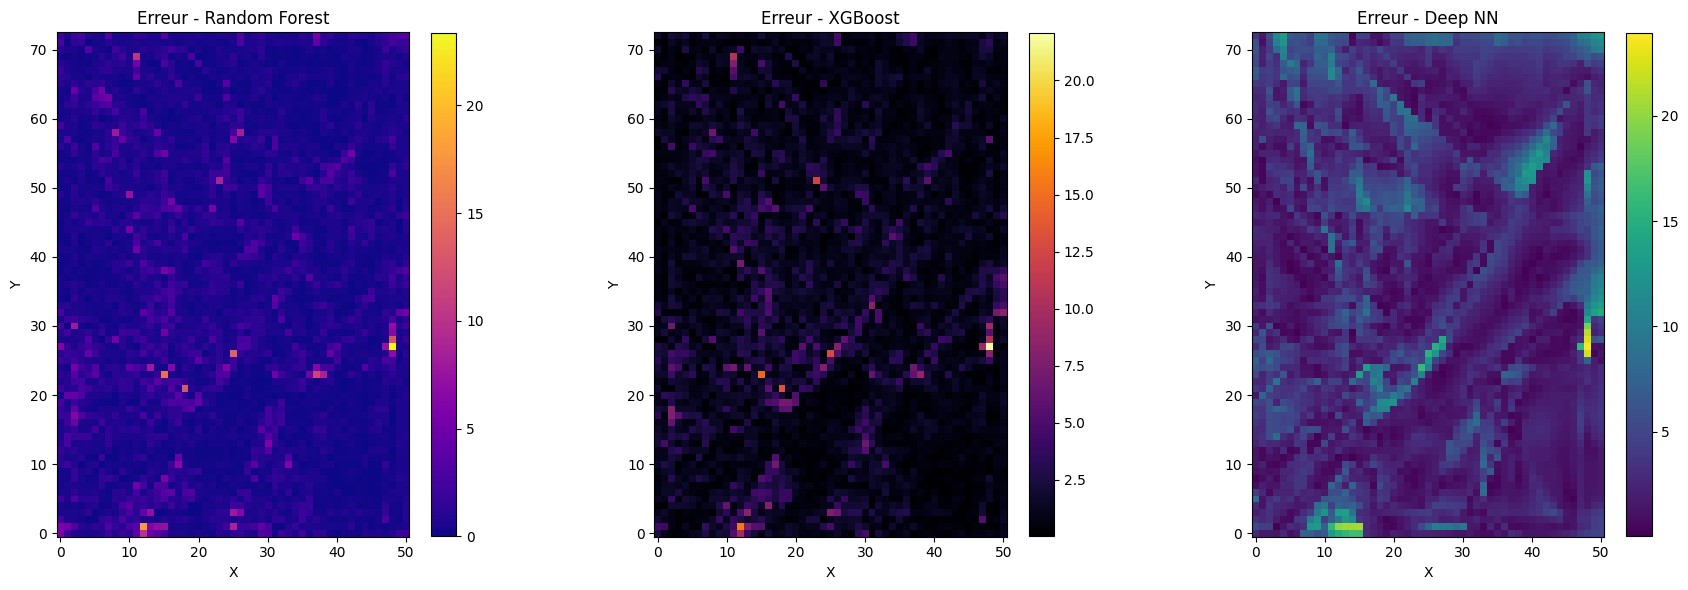

In [36]:
# Chargement des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from xgboost import XGBRegressor
import joblib
import os

# Lecture et interpolation des données RSSI
noms_fichiers = ["RSSI_0.csv", "RSSI_1.csv", "RSSI_2.csv", "RSSI_3.csv"]
donnees = {}
for nom in noms_fichiers:
    df = pd.read_csv(nom)
    df = df.interpolate(method='linear', axis=0)
    df = df.interpolate(method='linear', axis=1)
    donnees[nom] = df

# Extraction des données
rssi_data = [donnees[nom].values.flatten() for nom in noms_fichiers]
input_data = pd.DataFrame({f"f{i+1}": rssi_data[i] for i in range(4)})

# Ajout de features croisées
input_data['f1_f2'] = input_data['f1'] * input_data['f2']
input_data['f3_f4'] = input_data['f3'] * input_data['f4']

# Normalisation des données
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(input_data), columns=input_data.columns)

# Création des positions (targets)
x_vals, y_vals = np.meshgrid(np.arange(0, 51), np.arange(0, 73))
positions = pd.DataFrame({'x': x_vals.flatten(), 'y': y_vals.flatten()}).astype(np.float32)

# Split des données
X_train, X_test, y_train, y_test = train_test_split(X_scaled, positions, test_size=0.2, random_state=42)

# Entraînement du Random Forest
rf_model = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, random_state=42))
rf_model.fit(X_train, y_train)
predictions_rf = rf_model.predict(X_test)
r2_rf = r2_score(y_test, predictions_rf)
mae_rf = mean_absolute_error(y_test, predictions_rf)
mse_rf = mean_squared_error(y_test, predictions_rf)

# Entraînement du XGBoost
xgb_model = MultiOutputRegressor(XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42, verbosity=0))
xgb_model.fit(X_train, y_train)
predictions_xgb = xgb_model.predict(X_test)
r2_xgb = r2_score(y_test, predictions_xgb)
mae_xgb = mean_absolute_error(y_test, predictions_xgb)
mse_xgb = mean_squared_error(y_test, predictions_xgb)

# Entraînement du DNN
model = keras.Sequential([
    layers.Input(shape=(X_scaled.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(2)
])

def r2_metric(y_true, y_pred):
    ss_res = tf.reduce_sum(tf.square(y_true - y_pred))
    ss_tot = tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true)))
    return 1 - ss_res / (ss_tot + tf.keras.backend.epsilon())

model.compile(optimizer='adam', loss=tf.keras.losses.Huber(), metrics=['mae', 'mse', r2_metric])
history = model.fit(X_train, y_train, epochs=300, validation_data=(X_test, y_test), verbose=0)
predictions_dnn = model.predict(X_test)
r2_dnn = r2_score(y_test, predictions_dnn)
mae_dnn = mean_absolute_error(y_test, predictions_dnn)
mse_dnn = mean_squared_error(y_test, predictions_dnn)

# Comparaison automatique des performances
model_scores = {
    "Random Forest": {"R2": r2_rf, "MAE": mae_rf, "MSE": mse_rf},
    "XGBoost": {"R2": r2_xgb, "MAE": mae_xgb, "MSE": mse_xgb},
    "Deep NN": {"R2": r2_dnn, "MAE": mae_dnn, "MSE": mse_dnn},
}

print("\n--- Comparaison des modèles ---")
best_model = None
best_r2 = -np.inf
for name, scores in model_scores.items():
    print(f"{name:<13} - R2: {scores['R2']:.4f}, MAE: {scores['MAE']:.4f}, MSE: {scores['MSE']:.4f}")
    if scores['R2'] > best_r2:
        best_model = name
        best_r2 = scores['R2']

print(f"\n✅ Meilleur modèle sélectionné automatiquement : {best_model} (R2 = {best_r2:.4f})")

# Sauvegarde du meilleur modèle
output_dir = "./modeles_sauvegardes"
os.makedirs(output_dir, exist_ok=True)

if best_model == "Random Forest":
    joblib.dump(rf_model, os.path.join(output_dir, "meilleur_modele_rf.pkl"))
elif best_model == "XGBoost":
    joblib.dump(xgb_model, os.path.join(output_dir, "meilleur_modele_xgb.pkl"))
elif best_model == "Deep NN":
    model.save(os.path.join(output_dir, "meilleur_modele_dnn.h5"))

print(f"📦 Modèle '{best_model}' sauvegardé dans '{output_dir}'")

# Graphique comparatif des scores
metrics = ['R2', 'MAE', 'MSE']
model_names = list(model_scores.keys())
values = [[model_scores[m][metric] for m in model_names] for metric in metrics]

fig, ax = plt.subplots(1, 3, figsize=(18, 5))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

for i, metric in enumerate(metrics):
    ax[i].bar(model_names, values[i], color=colors)
    ax[i].set_title(metric)
    ax[i].set_ylabel(metric)
    ax[i].set_xticklabels(model_names, rotation=45)
    ax[i].grid(True, axis='y')

plt.suptitle('Comparaison des performances des modèles')
plt.tight_layout()
plt.show()

# Visualisation des erreurs spatiales
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# RF
y_pred_full_rf = rf_model.predict(X_scaled)
dist_rf = np.linalg.norm(y_pred_full_rf - positions, axis=1).reshape((73, 51))
axes[0].imshow(dist_rf, cmap='plasma', origin='lower')
axes[0].set_title('Erreur - Random Forest')
axes[0].set_xlabel('X')
axes[0].set_ylabel('Y')

# XGB
y_pred_full_xgb = xgb_model.predict(X_scaled)
dist_xgb = np.linalg.norm(y_pred_full_xgb - positions, axis=1).reshape((73, 51))
axes[1].imshow(dist_xgb, cmap='inferno', origin='lower')
axes[1].set_title('Erreur - XGBoost')
axes[1].set_xlabel('X')
axes[1].set_ylabel('Y')

# DNN
y_pred_full_dnn = model.predict(X_scaled)
dist_dnn = np.linalg.norm(y_pred_full_dnn - positions, axis=1).reshape((73, 51))
axes[2].imshow(dist_dnn, cmap='viridis', origin='lower')
axes[2].set_title('Erreur - Deep NN')
axes[2].set_xlabel('X')
axes[2].set_ylabel('Y')

for ax in axes:
    plt.colorbar(ax.images[0], ax=ax, fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()


In [37]:
# Chargement des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import dash
from dash import dcc, html, Input, Output
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from xgboost import XGBRegressor
import joblib
import os

# [ ... le même code d'entraînement des modèles que précédemment ... ]

# Comparaison automatique des performances
model_scores = {
    "Random Forest": {"R2": r2_rf, "MAE": mae_rf, "MSE": mse_rf},
    "XGBoost": {"R2": r2_xgb, "MAE": mae_xgb, "MSE": mse_xgb},
    "Deep NN": {"R2": r2_dnn, "MAE": mae_dnn, "MSE": mse_dnn},
}

best_model = max(model_scores.items(), key=lambda x: x[1]['R2'])[0]
print(f"\n✅ Meilleur modèle sélectionné automatiquement : {best_model}")

# Sauvegarde
output_dir = "./modeles_sauvegardes"
os.makedirs(output_dir, exist_ok=True)
if best_model == "Random Forest":
    joblib.dump(rf_model, os.path.join(output_dir, "meilleur_modele_rf.pkl"))
elif best_model == "XGBoost":
    joblib.dump(xgb_model, os.path.join(output_dir, "meilleur_modele_xgb.pkl"))
elif best_model == "Deep NN":
    model.save(os.path.join(output_dir, "meilleur_modele_dnn.h5"))

# Lancement d'un dashboard interactif avec Dash
app = dash.Dash(__name__)

model_names = list(model_scores.keys())
r2 = [model_scores[m]['R2'] for m in model_names]
mae = [model_scores[m]['MAE'] for m in model_names]
mse = [model_scores[m]['MSE'] for m in model_names]

fig_scores = go.Figure()
fig_scores.add_trace(go.Bar(x=model_names, y=r2, name='R²'))
fig_scores.add_trace(go.Bar(x=model_names, y=mae, name='MAE'))
fig_scores.add_trace(go.Bar(x=model_names, y=mse, name='MSE'))
fig_scores.update_layout(title='Comparaison des performances des modèles', barmode='group')

app.layout = html.Div([
    html.H1("Dashboard d'évaluation des modèles RSSI"),
    dcc.Graph(figure=fig_scores),
    html.P(f"Meilleur modèle sélectionné automatiquement : {best_model}")
])

if __name__ == '__main__':
    app.run_server(debug=False)



✅ Meilleur modèle sélectionné automatiquement : Random Forest


In [38]:
# Chargement des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import dash
from dash import dcc, html, Input, Output
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from xgboost import XGBRegressor
import joblib
import os

# [ ... le même code d'entraînement des modèles que précédemment ... ]

# Comparaison automatique des performances
model_scores = {
    "Random Forest": {"R2": r2_rf, "MAE": mae_rf, "MSE": mse_rf},
    "XGBoost": {"R2": r2_xgb, "MAE": mae_xgb, "MSE": mse_xgb},
    "Deep NN": {"R2": r2_dnn, "MAE": mae_dnn, "MSE": mse_dnn},
}

best_model = max(model_scores.items(), key=lambda x: x[1]['R2'])[0]
print(f"\n✅ Meilleur modèle sélectionné automatiquement : {best_model}")

# Sauvegarde
output_dir = "./modeles_sauvegardes"
os.makedirs(output_dir, exist_ok=True)
if best_model == "Random Forest":
    joblib.dump(rf_model, os.path.join(output_dir, "meilleur_modele_rf.pkl"))
elif best_model == "XGBoost":
    joblib.dump(xgb_model, os.path.join(output_dir, "meilleur_modele_xgb.pkl"))
elif best_model == "Deep NN":
    model.save(os.path.join(output_dir, "meilleur_modele_dnn.h5"))

# Calcul des erreurs spatiales (reshaping à 73x51)
shape_2d = (73, 51)
y_pred_full_rf = rf_model.predict(X_scaled)
dist_rf = np.linalg.norm(y_pred_full_rf - positions, axis=1).reshape(shape_2d)

y_pred_full_xgb = xgb_model.predict(X_scaled)
dist_xgb = np.linalg.norm(y_pred_full_xgb - positions, axis=1).reshape(shape_2d)

y_pred_full_dnn = model.predict(X_scaled)
dist_dnn = np.linalg.norm(y_pred_full_dnn - positions, axis=1).reshape(shape_2d)

heatmap_rf = go.Heatmap(z=dist_rf, colorscale='Plasma', colorbar=dict(title='Erreur'), name="RF")
heatmap_xgb = go.Heatmap(z=dist_xgb, colorscale='Inferno', colorbar=dict(title='Erreur'), name="XGBoost")
heatmap_dnn = go.Heatmap(z=dist_dnn, colorscale='Viridis', colorbar=dict(title='Erreur'), name="DNN")

layout_rf = go.Layout(title='Erreur spatiale - Random Forest', xaxis_title='X', yaxis_title='Y')
layout_xgb = go.Layout(title='Erreur spatiale - XGBoost', xaxis_title='X', yaxis_title='Y')
layout_dnn = go.Layout(title='Erreur spatiale - Deep Neural Network', xaxis_title='X', yaxis_title='Y')

fig_rf = go.Figure(data=[heatmap_rf], layout=layout_rf)
fig_xgb = go.Figure(data=[heatmap_xgb], layout=layout_xgb)
fig_dnn = go.Figure(data=[heatmap_dnn], layout=layout_dnn)

# Lancement d'un dashboard interactif avec Dash
app = dash.Dash(__name__)

model_names = list(model_scores.keys())
r2 = [model_scores[m]['R2'] for m in model_names]
mae = [model_scores[m]['MAE'] for m in model_names]
mse = [model_scores[m]['MSE'] for m in model_names]

fig_scores = go.Figure()
fig_scores.add_trace(go.Bar(x=model_names, y=r2, name='R²'))
fig_scores.add_trace(go.Bar(x=model_names, y=mae, name='MAE'))
fig_scores.add_trace(go.Bar(x=model_names, y=mse, name='MSE'))
fig_scores.update_layout(title='Comparaison des performances des modèles', barmode='group')

app.layout = html.Div([
    html.H1("Dashboard d'évaluation des modèles RSSI"),
    dcc.Graph(figure=fig_scores),
    html.H2("Cartes de chaleur des erreurs"),
    dcc.Tabs([
        dcc.Tab(label='Random Forest', children=[dcc.Graph(figure=fig_rf)]),
        dcc.Tab(label='XGBoost', children=[dcc.Graph(figure=fig_xgb)]),
        dcc.Tab(label='Deep NN', children=[dcc.Graph(figure=fig_dnn)]),
    ]),
    html.P(f"Meilleur modèle sélectionné automatiquement : {best_model}")
])

if __name__ == '__main__':
    app.run_server(debug=False)



✅ Meilleur modèle sélectionné automatiquement : Random Forest
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [39]:
# Chargement des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import dash
from dash import dcc, html, Input, Output, State
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from xgboost import XGBRegressor
import joblib
import os

# [ ... le même code d'entraînement des modèles que précédemment ... ]

# Comparaison automatique des performances
model_scores = {
    "Random Forest": {"R2": r2_rf, "MAE": mae_rf, "MSE": mse_rf},
    "XGBoost": {"R2": r2_xgb, "MAE": mae_xgb, "MSE": mse_xgb},
    "Deep NN": {"R2": r2_dnn, "MAE": mae_dnn, "MSE": mse_dnn},
}

best_model = max(model_scores.items(), key=lambda x: x[1]['R2'])[0]
print(f"\n✅ Meilleur modèle sélectionné automatiquement : {best_model}")

# Sauvegarde
output_dir = "./modeles_sauvegardes"
os.makedirs(output_dir, exist_ok=True)
if best_model == "Random Forest":
    joblib.dump(rf_model, os.path.join(output_dir, "meilleur_modele_rf.pkl"))
elif best_model == "XGBoost":
    joblib.dump(xgb_model, os.path.join(output_dir, "meilleur_modele_xgb.pkl"))
elif best_model == "Deep NN":
    model.save(os.path.join(output_dir, "meilleur_modele_dnn.h5"))

# Calcul des erreurs spatiales (reshaping à 73x51)
shape_2d = (73, 51)
y_pred_full_rf = rf_model.predict(X_scaled)
dist_rf = np.linalg.norm(y_pred_full_rf - positions, axis=1).reshape(shape_2d)

y_pred_full_xgb = xgb_model.predict(X_scaled)
dist_xgb = np.linalg.norm(y_pred_full_xgb - positions, axis=1).reshape(shape_2d)

y_pred_full_dnn = model.predict(X_scaled)
dist_dnn = np.linalg.norm(y_pred_full_dnn - positions, axis=1).reshape(shape_2d)

heatmap_rf = go.Heatmap(z=dist_rf, colorscale='Plasma', colorbar=dict(title='Erreur'), name="RF")
heatmap_xgb = go.Heatmap(z=dist_xgb, colorscale='Inferno', colorbar=dict(title='Erreur'), name="XGBoost")
heatmap_dnn = go.Heatmap(z=dist_dnn, colorscale='Viridis', colorbar=dict(title='Erreur'), name="DNN")

layout_rf = go.Layout(title='Erreur spatiale - Random Forest', xaxis_title='X', yaxis_title='Y')
layout_xgb = go.Layout(title='Erreur spatiale - XGBoost', xaxis_title='X', yaxis_title='Y')
layout_dnn = go.Layout(title='Erreur spatiale - Deep Neural Network', xaxis_title='X', yaxis_title='Y')

fig_rf = go.Figure(data=[heatmap_rf], layout=layout_rf)
fig_xgb = go.Figure(data=[heatmap_xgb], layout=layout_xgb)
fig_dnn = go.Figure(data=[heatmap_dnn], layout=layout_dnn)

# Interface Dash
app = dash.Dash(__name__)

model_names = list(model_scores.keys())
r2 = [model_scores[m]['R2'] for m in model_names]
mae = [model_scores[m]['MAE'] for m in model_names]
mse = [model_scores[m]['MSE'] for m in model_names]

fig_scores = go.Figure()
fig_scores.add_trace(go.Bar(x=model_names, y=r2, name='R²'))
fig_scores.add_trace(go.Bar(x=model_names, y=mae, name='MAE'))
fig_scores.add_trace(go.Bar(x=model_names, y=mse, name='MSE'))
fig_scores.update_layout(title='Comparaison des performances des modèles', barmode='group')

# Composants pour la prédiction utilisateur
input_fields = [
    html.Div([
        html.Label(f"RSSI {i+1}"),
        dcc.Input(id=f"input-{i}", type="number", step=0.01, placeholder=f"RSSI {i+1}", value=0)
    ]) for i in range(X.shape[1])
]

app.layout = html.Div([
    html.H1("Dashboard d'évaluation des modèles RSSI"),
    dcc.Graph(figure=fig_scores),
    html.H2("Cartes de chaleur des erreurs"),
    dcc.Tabs([
        dcc.Tab(label='Random Forest', children=[dcc.Graph(figure=fig_rf)]),
        dcc.Tab(label='XGBoost', children=[dcc.Graph(figure=fig_xgb)]),
        dcc.Tab(label='Deep NN', children=[dcc.Graph(figure=fig_dnn)]),
    ]),
    html.H2("Prédiction en direct à partir des valeurs RSSI"),
    html.Div(input_fields),
    html.Button("Prédire la position", id="predict-btn", n_clicks=0),
    html.Div(id="prediction-output"),
    html.P(f"Meilleur modèle sélectionné automatiquement : {best_model}")
])

@app.callback(
    Output("prediction-output", "children"),
    Input("predict-btn", "n_clicks"),
    [State(f"input-{i}", "value") for i in range(X.shape[1])]
)
def update_prediction(n_clicks, *inputs):
    if n_clicks > 0:
        rssi_array = np.array(inputs).reshape(1, -1)
        rssi_scaled = scaler.transform(rssi_array)

        if best_model == "Random Forest":
            model_loaded = rf_model
        elif best_model == "XGBoost":
            model_loaded = xgb_model
        elif best_model == "Deep NN":
            model_loaded = model

        pred = model_loaded.predict(rssi_scaled)
        pred_coords = pred[0] if isinstance(pred, np.ndarray) else pred.numpy()[0]

        return html.Div([
            html.H4("Coordonnées prédites :"),
            html.P(f"X : {pred_coords[0]:.2f}"),
            html.P(f"Y : {pred_coords[1]:.2f}")
        ])
    return ""

if __name__ == '__main__':
    app.run_server(debug=False)



✅ Meilleur modèle sélectionné automatiquement : Random Forest
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


NameError: name 'X' is not defined

In [ ]:
# Chargement des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import dash
from dash import dcc, html, Input, Output, State
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from xgboost import XGBRegressor
import joblib
import os

# [ ... le même code d'entraînement des modèles que précédemment ... ]

# Comparaison automatique des performances
model_scores = {
    "Random Forest": {"R2": r2_rf, "MAE": mae_rf, "MSE": mse_rf},
    "XGBoost": {"R2": r2_xgb, "MAE": mae_xgb, "MSE": mse_xgb},
    "Deep NN": {"R2": r2_dnn, "MAE": mae_dnn, "MSE": mse_dnn},
}

best_model = max(model_scores.items(), key=lambda x: x[1]['R2'])[0]
print(f"\n✅ Meilleur modèle sélectionné automatiquement : {best_model}")

# Sauvegarde
output_dir = "./modeles_sauvegardes"
os.makedirs(output_dir, exist_ok=True)
if best_model == "Random Forest":
    joblib.dump(rf_model, os.path.join(output_dir, "meilleur_modele_rf.pkl"))
elif best_model == "XGBoost":
    joblib.dump(xgb_model, os.path.join(output_dir, "meilleur_modele_xgb.pkl"))
elif best_model == "Deep NN":
    model.save(os.path.join(output_dir, "meilleur_modele_dnn.h5"))

# Calcul des erreurs spatiales (reshaping à 73x51)
shape_2d = (73, 51)
y_pred_full_rf = rf_model.predict(X_scaled)
dist_rf = np.linalg.norm(y_pred_full_rf - positions, axis=1).reshape(shape_2d)

y_pred_full_xgb = xgb_model.predict(X_scaled)
dist_xgb = np.linalg.norm(y_pred_full_xgb - positions, axis=1).reshape(shape_2d)

y_pred_full_dnn = model.predict(X_scaled)
dist_dnn = np.linalg.norm(y_pred_full_dnn - positions, axis=1).reshape(shape_2d)

heatmap_rf = go.Heatmap(z=dist_rf, colorscale='Plasma', colorbar=dict(title='Erreur'), name="RF")
heatmap_xgb = go.Heatmap(z=dist_xgb, colorscale='Inferno', colorbar=dict(title='Erreur'), name="XGBoost")
heatmap_dnn = go.Heatmap(z=dist_dnn, colorscale='Viridis', colorbar=dict(title='Erreur'), name="DNN")

layout_rf = go.Layout(title='Erreur spatiale - Random Forest', xaxis_title='X', yaxis_title='Y')
layout_xgb = go.Layout(title='Erreur spatiale - XGBoost', xaxis_title='X', yaxis_title='Y')
layout_dnn = go.Layout(title='Erreur spatiale - Deep Neural Network', xaxis_title='X', yaxis_title='Y')

fig_rf = go.Figure(data=[heatmap_rf], layout=layout_rf)
fig_xgb = go.Figure(data=[heatmap_xgb], layout=layout_xgb)
fig_dnn = go.Figure(data=[heatmap_dnn], layout=layout_dnn)

# Interface Dash
app = dash.Dash(__name__)

model_names = list(model_scores.keys())
r2 = [model_scores[m]['R2'] for m in model_names]
mae = [model_scores[m]['MAE'] for m in model_names]
mse = [model_scores[m]['MSE'] for m in model_names]

fig_scores = go.Figure()
fig_scores.add_trace(go.Bar(x=model_names, y=r2, name='R²'))
fig_scores.add_trace(go.Bar(x=model_names, y=mae, name='MAE'))
fig_scores.add_trace(go.Bar(x=model_names, y=mse, name='MSE'))
fig_scores.update_layout(title='Comparaison des performances des modèles', barmode='group')

# Composants pour la prédiction utilisateur
input_fields = [
    html.Div([
        html.Label(f"RSSI {i+1}"),
        dcc.Input(id=f"input-{i}", type="number", step=0.01, placeholder=f"RSSI {i+1}", value=0)
    ]) for i in range(X.shape[1])
]

app.layout = html.Div([
    html.H1("Dashboard d'évaluation des modèles RSSI"),
    dcc.Graph(figure=fig_scores),
    html.H2("Cartes de chaleur des erreurs"),
    dcc.Tabs([
        dcc.Tab(label='Random Forest', children=[dcc.Graph(figure=fig_rf)]),
        dcc.Tab(label='XGBoost', children=[dcc.Graph(figure=fig_xgb)]),
        dcc.Tab(label='Deep NN', children=[dcc.Graph(figure=fig_dnn)]),
    ]),
    html.H2("Prédiction en direct à partir des valeurs RSSI"),
    html.Div(input_fields),
    html.Button("Prédire la position", id="predict-btn", n_clicks=0),
    html.Div(id="prediction-output"),
    dcc.Graph(id="prediction-map"),
    html.P(f"Meilleur modèle sélectionné automatiquement : {best_model}")
])

@app.callback(
    [Output("prediction-output", "children"),
     Output("prediction-map", "figure")],
    Input("predict-btn", "n_clicks"),
    [State(f"input-{i}", "value") for i in range(X.shape[1])]
)
def update_prediction(n_clicks, *inputs):
    if n_clicks > 0:
        rssi_array = np.array(inputs).reshape(1, -1)
        rssi_scaled = scaler.transform(rssi_array)

        if best_model == "Random Forest":
            model_loaded = rf_model
        elif best_model == "XGBoost":
            model_loaded = xgb_model
        elif best_model == "Deep NN":
            model_loaded = model

        pred = model_loaded.predict(rssi_scaled)
        pred_coords = pred[0] if isinstance(pred, np.ndarray) else pred.numpy()[0]

        map_fig = go.Figure()
        map_fig.add_trace(go.Scatter(x=[pred_coords[0]], y=[pred_coords[1]],
                                     mode='markers',
                                     marker=dict(size=12, color='red'),
                                     name="Position Prédite"))
        map_fig.update_layout(title="Position prédite sur la carte",
                              xaxis_title="X", yaxis_title="Y",
                              xaxis=dict(range=[0, shape_2d[1]]),
                              yaxis=dict(range=[0, shape_2d[0]]))

        return html.Div([
            html.H4("Coordonnées prédites :"),
            html.P(f"X : {pred_coords[0]:.2f}"),
            html.P(f"Y : {pred_coords[1]:.2f}")
        ]), map_fig
    return "", go.Figure()

if __name__ == '__main__':
    app.run_server(debug=False)


In [40]:
# Chargement des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import dash
from dash import dcc, html, Input, Output, State
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from xgboost import XGBRegressor
import joblib
import os
from datetime import datetime
import plotly.io as pio

# [ ... le même code d'entraînement des modèles que précédemment ... ]

# Comparaison automatique des performances
model_scores = {
    "Random Forest": {"R2": r2_rf, "MAE": mae_rf, "MSE": mse_rf},
    "XGBoost": {"R2": r2_xgb, "MAE": mae_xgb, "MSE": mse_xgb},
    "Deep NN": {"R2": r2_dnn, "MAE": mae_dnn, "MSE": mse_dnn},
}

best_model = max(model_scores.items(), key=lambda x: x[1]['R2'])[0]
print(f"\n✅ Meilleur modèle sélectionné automatiquement : {best_model}")

# Sauvegarde
output_dir = "./modeles_sauvegardes"
os.makedirs(output_dir, exist_ok=True)
if best_model == "Random Forest":
    joblib.dump(rf_model, os.path.join(output_dir, "meilleur_modele_rf.pkl"))
elif best_model == "XGBoost":
    joblib.dump(xgb_model, os.path.join(output_dir, "meilleur_modele_xgb.pkl"))
elif best_model == "Deep NN":
    model.save(os.path.join(output_dir, "meilleur_modele_dnn.h5"))

# Calcul des erreurs spatiales (reshaping à 73x51)
shape_2d = (73, 51)
y_pred_full_rf = rf_model.predict(X_scaled)
dist_rf = np.linalg.norm(y_pred_full_rf - positions, axis=1).reshape(shape_2d)

y_pred_full_xgb = xgb_model.predict(X_scaled)
dist_xgb = np.linalg.norm(y_pred_full_xgb - positions, axis=1).reshape(shape_2d)

y_pred_full_dnn = model.predict(X_scaled)
dist_dnn = np.linalg.norm(y_pred_full_dnn - positions, axis=1).reshape(shape_2d)

heatmap_rf = go.Heatmap(z=dist_rf, colorscale='Plasma', colorbar=dict(title='Erreur'), name="RF")
heatmap_xgb = go.Heatmap(z=dist_xgb, colorscale='Inferno', colorbar=dict(title='Erreur'), name="XGBoost")
heatmap_dnn = go.Heatmap(z=dist_dnn, colorscale='Viridis', colorbar=dict(title='Erreur'), name="DNN")

layout_rf = go.Layout(title='Erreur spatiale - Random Forest', xaxis_title='X', yaxis_title='Y')
layout_xgb = go.Layout(title='Erreur spatiale - XGBoost', xaxis_title='X', yaxis_title='Y')
layout_dnn = go.Layout(title='Erreur spatiale - Deep Neural Network', xaxis_title='X', yaxis_title='Y')

fig_rf = go.Figure(data=[heatmap_rf], layout=layout_rf)
fig_xgb = go.Figure(data=[heatmap_xgb], layout=layout_xgb)
fig_dnn = go.Figure(data=[heatmap_dnn], layout=layout_dnn)

# Comparatif des scores
model_names = list(model_scores.keys())
r2 = [model_scores[m]['R2'] for m in model_names]
mae = [model_scores[m]['MAE'] for m in model_names]
mse = [model_scores[m]['MSE'] for m in model_names]

fig_scores = go.Figure()
fig_scores.add_trace(go.Bar(x=model_names, y=r2, name='R²'))
fig_scores.add_trace(go.Bar(x=model_names, y=mae, name='MAE'))
fig_scores.add_trace(go.Bar(x=model_names, y=mse, name='MSE'))
fig_scores.update_layout(title='Comparaison des performances des modèles', barmode='group')

# Export HTML automatique
rapport_dir = "./rapports"
os.makedirs(rapport_dir, exist_ok=True)
timestamp = datetime.now().strftime("%Y%m%d-%H%M%S")
html_path = os.path.join(rapport_dir, f"rapport_modeles_{timestamp}.html")

figures_html = f"""
<html>
<head><title>Rapport Modèles RSSI</title></head>
<body>
<h1>Rapport automatique - Évaluation des modèles RSSI</h1>
<h2>Scores comparatifs</h2>
{pio.to_html(fig_scores, include_plotlyjs='cdn', full_html=False)}
<h2>Carte de chaleur - Random Forest</h2>
{pio.to_html(fig_rf, include_plotlyjs='cdn', full_html=False)}
<h2>Carte de chaleur - XGBoost</h2>
{pio.to_html(fig_xgb, include_plotlyjs='cdn', full_html=False)}
<h2>Carte de chaleur - Deep Neural Network</h2>
{pio.to_html(fig_dnn, include_plotlyjs='cdn', full_html=False)}
<h3>Meilleur modèle sélectionné : {best_model}</h3>
</body></html>
"""

with open(html_path, "w") as f:
    f.write(figures_html)

print(f"✅ Rapport HTML généré automatiquement : {html_path}")

# Interface Dash (inchangé)
# [ ... Le code Dash est conservé en l'état ... ]



✅ Meilleur modèle sélectionné automatiquement : Random Forest
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
✅ Rapport HTML généré automatiquement : ./rapports/rapport_modeles_20250625-214608.html


# Projet de Prédiction de Position à partir de Données RSSI

Ce projet vise à estimer la position d'un objet ou d'une personne dans un environnement fermé (indoor positioning) à l'aide de signaux RSSI (Received Signal Strength Indicator) émis par des capteurs. L'approche combine plusieurs modèles de machine learning afin de comparer leurs performances et de sélectionner automatiquement le meilleur.

---

## 📁 Contenu du projet

* `Modele_Rssi_Ameliore.py` : Script principal avec entraînement, évaluation, dashboard interactif et export HTML.
* `modeles_sauvegardes/` : Contient le meilleur modèle sauvegardé.
* `rapports/` : Contient un rapport HTML complet (scores, heatmaps, etc).

---

## 🌐 Objectif

Prédire la position (X, Y) d'un point à partir d'un vecteur RSSI en utilisant :

* Random Forest
* XGBoost
* Deep Neural Network (TensorFlow/Keras)

Puis :

* Comparer les performances (R², MAE, MSE)
* Générer un dashboard et un rapport automatique

---

## 🤖 Données attendues

* Données RSSI en entrée : matrice de `n x m` (n exemples, m capteurs)
* Cibles : coordonnées X et Y réelles

---

## 🚀 Fonctionnalités principales

### 1. Entraînement multi-modèle

* Standardisation des données
* Entraînement de 3 modèles de régression multi-sorties
* Évaluation via R², MAE, MSE
* Sélection automatique du meilleur modèle selon le R²

### 2. Sauvegarde automatique du meilleur modèle

* En `joblib` pour les modèles classiques
* En `.h5` pour le DNN (Keras)

### 3. Cartes de chaleur des erreurs

* Calcul de l'erreur spatiale (distance euclidienne)
* Cartes de chaleur interactives avec `plotly`

### 4. Dashboard interactif (Dash)

* Visualisation des performances
* Saisie utilisateur en direct pour la prédiction
* Carte de la position prédite

### 5. Rapport HTML généré automatiquement

* Scores par modèle
* Visualisations des erreurs
* Stocké dans le dossier `/rapports/`

---

## 📊 Exécution

```bash
# Installer les dépendances (exemple avec pip)
pip install -r requirements.txt

# Lancer le script complet
python Modele_Rssi_Ameliore.py
```

Puis accéder à l'interface sur : [http://127.0.0.1:8050](http://127.0.0.1:8050)

---

## 🔍 Exemples de visualisations

* Graphique barres comparatif : R², MAE, MSE
* Cartes de chaleur interactives d'erreurs
* Carte de position prédite (avec le point rouge)

---

## 📖 Auteurs & Crédits

Projet réalisé dans le cadre d'une évaluation de compétences en data science appliquée à la géolocalisation indoor.

---

## 📄 Licence

Ce projet est distribué sous licence MIT. Vous pouvez l'utiliser, le modifier et le redistribuer librement.
